Allows multiple variables to display without using a print statement
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

This lets the notebook user a wider part of your screen.

In [26]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [1]:
#Downloads and unpack US Census County Data from census.gov
import downloadUSACounties


**Download and extraction complete.
If their where no other messages, files already present.


In [2]:
#Creates Mongo database 'Census' and collection 'Mastdata' used to make Census data human-readable
#added this line to see if I could make a branch work
import loadMastdata

Index(['Item_Id', 'Item_Description', 'Unit_Indicator', 'Decimal_Indicator',
       'US_Total', 'Source1', 'Source11'],
      dtype='object')
**Database already exists and is loaded.


In [28]:
#Get path to Data directory with downloaded .csv files
import os
jupyterDir = os.path.realpath('../')
print('Proj -', jupyterDir)
csvDir = os.path.join(jupyterDir,'Data')
print(csvDir)
os.listdir(csvDir)

Proj - C:\Users\Randy\Documents\GitHub\2017_MSDS_7331_DataMining
C:\Users\Randy\Documents\GitHub\2017_MSDS_7331_DataMining\Data


['2017_QHP_Landscape_Individual_Market_Dental.csv']

In [45]:
#Import the 2017 Healthcare Individual Market Dental data
#sourced from    https://data.healthcare.gov/dataset/2017-QHP-Landscape-Individual-Market-Dental-Excel/f6am-7dvb

import pandas as pd
infile = '2017_QHP_Landscape_Individual_Market_Dental.csv'
infilepath = csvDir + '\\'+ infile
print(infilepath)

#define a mapping dictionary for fields as needed
#FIPS County Code - Was stripping leading zeros and coming in as a number, it is a zip code

dtype_dict = {'FIPS County Code': str}
df = pd.read_csv(infilepath,header ='infer',sep=',',dtype=dtype_dict)
df.columns = [c.replace(' ','_') for c in df.columns]
df.head(5)
df.describe()

#Note the output below shows the first few and last few columns and first few and last few rows
#How to show all columns?

C:\Users\Randy\Documents\GitHub\2017_MSDS_7331_DataMining\Data\2017_QHP_Landscape_Individual_Market_Dental.csv


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


State_Code FIPS_County_Code     County_Name Metal_Level  \
0         AK            02013  Aleutians East         Low   
1         AK            02013  Aleutians East        High   
2         AK            02013  Aleutians East        High   
3         AK            02013  Aleutians East         Low   
4         AK            02013  Aleutians East         Low   

                              Issuer_Name  HIOS_Issuer_ID  \
0                   Oregon Dental Service           21989   
1  BEST Life and Health Insurance Company           74819   
2  BEST Life and Health Insurance Company           74819   
3  BEST Life and Health Insurance Company           74819   
4  BEST Life and Health Insurance Company           74819   

  Plan_ID_(Standard_Component)        Plan_Marketing_Name  Plan_Type  \
0               21989AK0030001  Delta Dental Premier Plan  Indemnity   
1               74819AK0020003     BESTOne Advantage Gold        PPO   
2               74819AK0020004          BESTOne Plus Gold        PPO   
3               74819AK0020005        BESTOne Plus Silver        PPO   
4               74819AK0020006       BESTOne Basic Silver        PPO   

     Rating_Area         ...          \
0  Rating Area 2         ...           
1  Rating Area 2         ...           
2  Rating Area 2         ...           
3  Rating Area 2         ...           
4  Rating Area 2         ...           

  Dental_Maximum_Out_of_Pocket_-_Family_-_Standard  \
0                                             $700   
1                                             $700   
2                                             $700   
3                                             $700   
4                                             $700   

  Dental_Maximum_Out_of_Pocket_-_Family_(Per_Person)_-_Standard  \
0                                               $350              
1                                               $350              
2                                               $350              
3                                               $350              
4                                               $350              

  Routine_Dental_Services_-_Adult         Basic_Dental_Care_-_Adult  \
0                             20%                               35%   
1                       No Charge  10% Coinsurance after deductible   
2                       No Charge  30% Coinsurance after deductible   
3                       No Charge  30% Coinsurance after deductible   
4                       No Charge  50% Coinsurance after deductible   

          Major_Dental_Care_-_Adult Orthodontia_-_Adult  \
0                               50%         Not Covered   
1  50% Coinsurance after deductible         Not Covered   
2  60% Coinsurance after deductible         Not Covered   
3  60% Coinsurance after deductible         Not Covered   
4  70% Coinsurance after deductible         Not Covered   

  Dental_Check-Up_for_Children            Basic_Dental_Care_-_Child  \
0                          20%                                  35%   
1                    No Charge  30.00% Coinsurance after deductible   
2                    No Charge  30.00% Coinsurance after deductible   
3                    No Charge     30% Coinsurance after deductible   
4                    No Charge     30% Coinsurance after deductible   

             Major_Dental_Care_-_Child Orthodontia_-_Child  
0                                  50%                 50%  
1  50.00% Coinsurance after deductible              50.00%  
2  50.00% Coinsurance after deductible              50.00%  
3     50% Coinsurance after deductible                 50%  
4     50% Coinsurance after deductible                 50%  

[5 rows x 79 columns]

HIOS_Issuer_ID  Drug_Formulary_URL  Premium_Rates  Standard_On_Exchange
count    50439.000000                 0.0            0.0                   0.0
mean     52943.592002                 NaN            NaN                   NaN
std      25372.432395                 NaN            NaN                   NaN
min      10046.000000                 NaN            NaN                   NaN
25%      30115.000000                 NaN            NaN                   NaN
50%      50022.000000                 NaN            NaN                   NaN
75%      75293.000000                 NaN            NaN                   NaN
max      99787.000000                 NaN            NaN                   NaN

In [52]:
#import statenames
import us
us.states.mapping('abbr','name')
#How can we list all states and show the ones in our dataset

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'DK': 'Dakota',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OL': 'Orleans',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PI': 'Philippine Islands',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 

In [47]:
#List of states in the dataset
statelist = list(set(df.State_Code))
print('Count of states =', len(statelist))
print(statelist)

Count of states = 39
['MS', 'AK', 'LA', 'OR', 'GA', 'NJ', 'DE', 'ME', 'KY', 'MI', 'OH', 'MO', 'VA', 'HI', 'NM', 'PA', 'MT', 'SD', 'KS', 'IA', 'ND', 'IL', 'FL', 'UT', 'TN', 'IN', 'NH', 'WI', 'WV', 'SC', 'NE', 'NV', 'NC', 'OK', 'AZ', 'TX', 'WY', 'AR', 'AL']


(273,
 5,
 [-179.14734, 17.884813, 0.0, 0.0],
 [179.77847, 71.35256064399981, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1b341e792e8>)

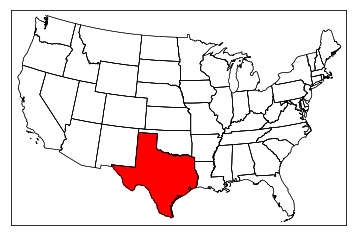

In [61]:
#conda install -c conda-forge basemap=1.0.8.dev0
#conda install -c conda-forge basemap-data-hires      Need this for high resolution maps like county maps

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
# collect the state names from the shapefile attributes so we can

# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon   -  I can get it to work for one state, how do I convert state abbreviations to statenames and pass in a list of states?
seg = map.states[state_names.index('Texas')]
#seg = map.states[statelist]

poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


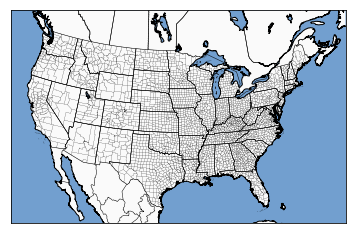

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map_background(m, ax):
    ax.set_axis_bgcolor('#729FCF')
    m.fillcontinents(color='#FAFAFA', ax=ax, zorder=0)
    m.drawcounties(ax=ax)
    m.drawstates(ax=ax)
    m.drawcountries(ax=ax)
    m.drawcoastlines(ax=ax)
KM = 1000.
# 750 zooms in but doesn't make the map larger not sure how to do that
#KM = 750.  
clat = 39.3
clon = -94.7333
wid = 5500 * KM
hgt = 3500 * KM
m = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
            resolution='i', area_thresh=2500., projection='lcc',
            lat_1=38.5, lat_2=38.5, lat_0=clat, lon_0=clon)
fig = plt.figure()
ax = fig.add_subplot(111)
draw_map_background(m, ax)
plt.show()

## Business Understanding (10 points)
#Describe the purpose of the data set you selected (i.e., why was this data collected in the ﬁrst place?). 
#Describe how you would deﬁne and measure the outcomes from the dataset. 
#That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? 
#How would you measure the effectiveness of a good prediction algorithm? Be speciﬁc. 

| Variable | Type | Definition |
|:--------:|:----:|:----------:|
| x | int | x coord |
| y | int | y coord |


## Data Understanding (80 points)

#### 10 points - Describe data, outcome metrics,
#1)Describe the purpose of the data set, why was the data collected.  Define outcome measures, what is important, 
#how do you know if you achieved the objective.  How to measure the effectiveness of a good prediction algorythm.

In [ ]:
#### 15 points - Data Quality, Explain data cleansing steps, give justifications

(<_io.TextIOWrapper name='downloadUSACounties.py' mode='r' encoding='utf-8'>,
 'downloadUSACounties.py',
 ('.py', 'r', 1))

In [ ]:
#### 10 points - Visualize appropriate statistics on a subset of the data, explain why the statistics are meaningful

In [ ]:
#### 15 points - Visualize 5 or more interesting attributes, interpret implications for each visualization, explain for each attribute, why the visualization is appropriate.

In [ ]:
#### 15 points - Visualize relationships between attributes, ie scatter plots, correlation, cross=tabulation, groupwise avgs, etc.  Explain interesting relationships

In [ ]:
#### 10 points - Identify and explain interesting relationships between features and the class you are trying to predict

In [ ]:
#### 5 points - Are there other features that could be added to the data or created from existing features, explain.

## Exceptional Work (10 points)

In [ ]:
#### Free reign on additional analysis (since there are four of us we better do this!)
#### Dimensional reduction, image processing, etc.